In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Handwriting recognition


## Data import and visualization


Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt("data_labs/mnist_train_small.csv", delimiter=",")
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector


In [3]:
labels_full = data[:, 0]
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels


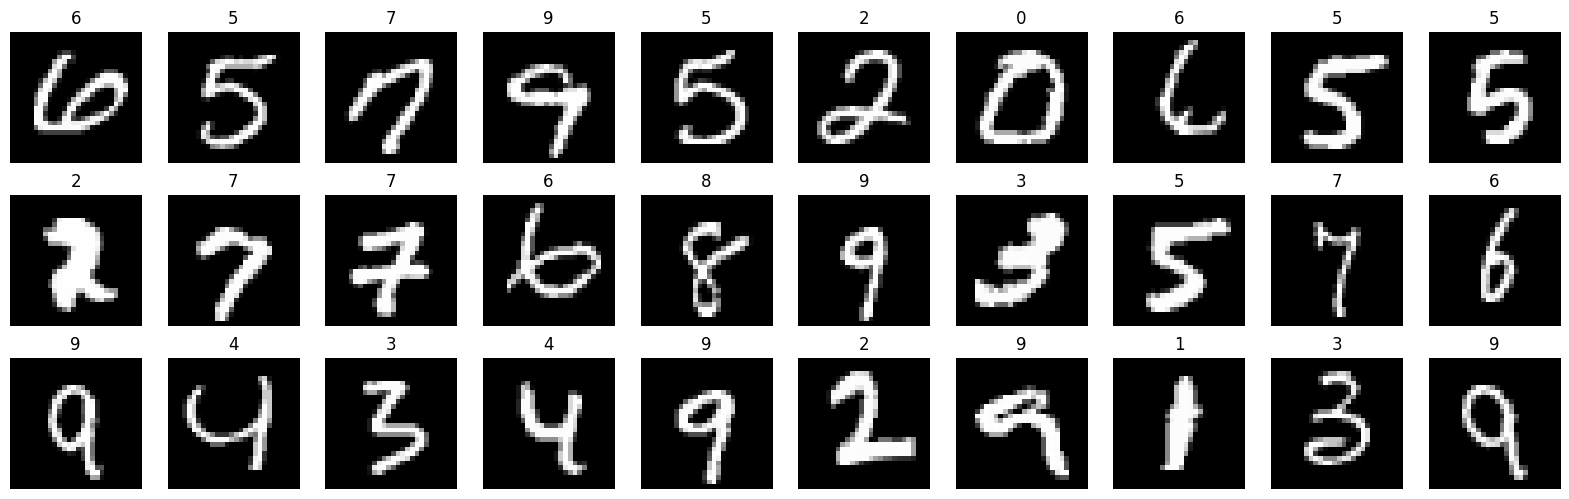

In [4]:
fig, axs = plt.subplots(ncols=10, nrows=3, figsize=(20, 6))
axs = axs.reshape((-1,))
for i in range(30):
    image_i = A_full[:, i].reshape((28, 28))
    axs[i].imshow(image_i, cmap="gray")
    axs[i].set_title(int(labels_full[i]))
    axs[i].axis("off")

Visualize the first 30 pictures corresponding the the digit "9"


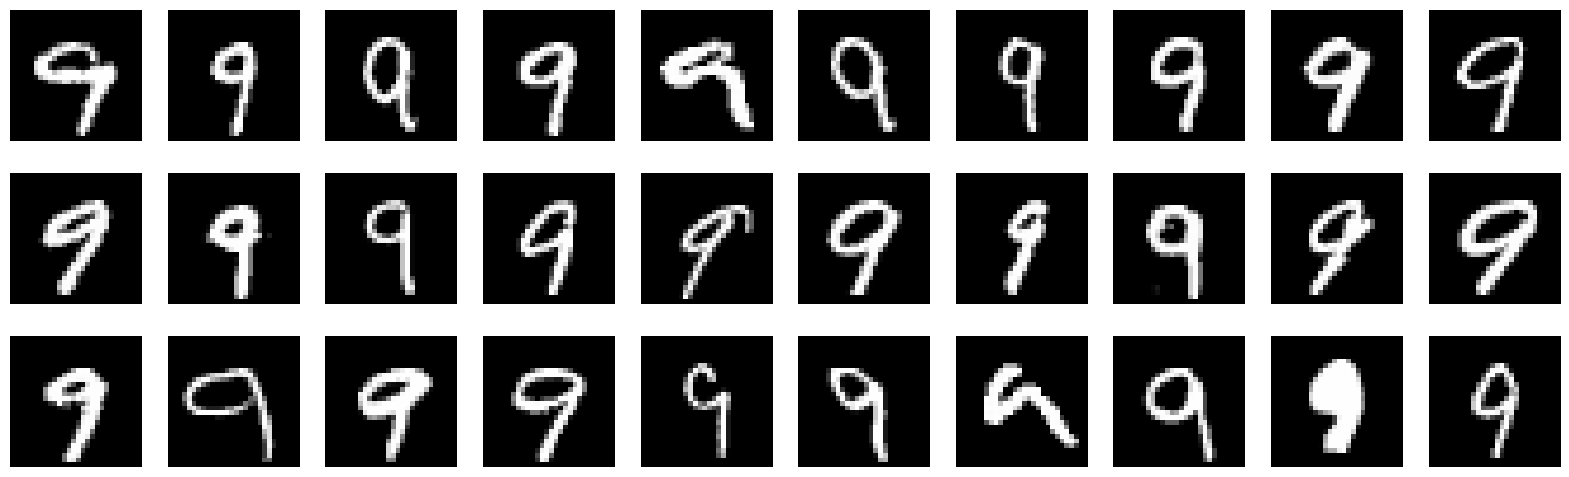

In [5]:
A_filtered = A_full[:, labels_full == 9]
fig, axs = plt.subplots(ncols=10, nrows=3, figsize=(20, 6))
axs = axs.reshape((-1,))
for i in range(30):
    image_i = A_filtered[:, i].reshape((28, 28))
    axs[i].imshow(image_i, cmap="gray")
    axs[i].axis("off")

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.


In [6]:
digits = (0, 9)
mask = np.logical_or(labels_full == digits[0], labels_full == digits[1])
A = A_full[:, mask]
labels = labels_full[mask]

Plot the first 30 training images.


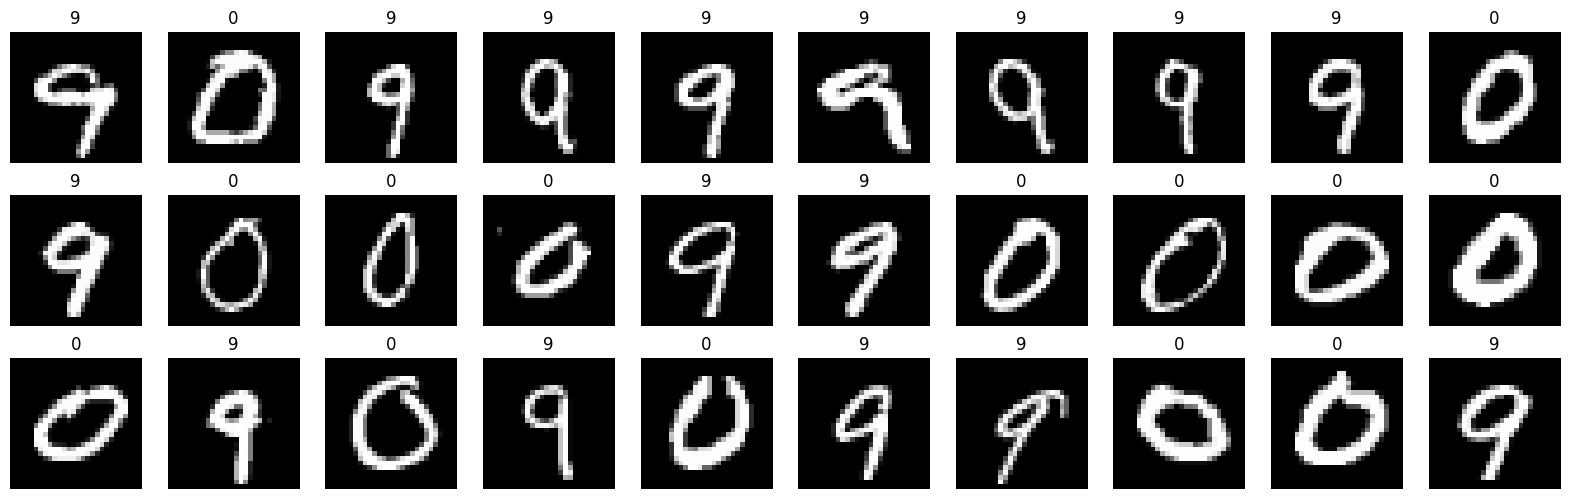

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(20, 6))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    image_i = A[:, i].reshape((28, 28))
    axs[i].imshow(image_i, cmap="gray")
    axs[i].set_title(int(labels[i]))
    axs[i].axis("off")

Compute and visualize the average of the training data


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

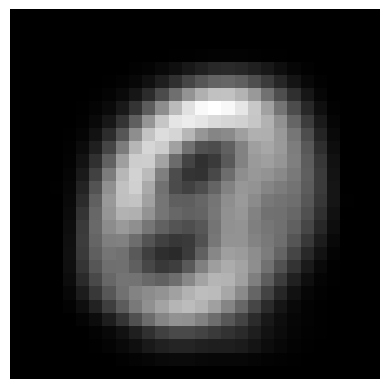

In [8]:
A_mean = A.mean(axis=1)
plt.imshow(A_mean.reshape((28, 28)), cmap="gray")
plt.axis("off")

Perform PCA on the data. Then, plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


Text(0.5, 1.0, 'Explained variance')

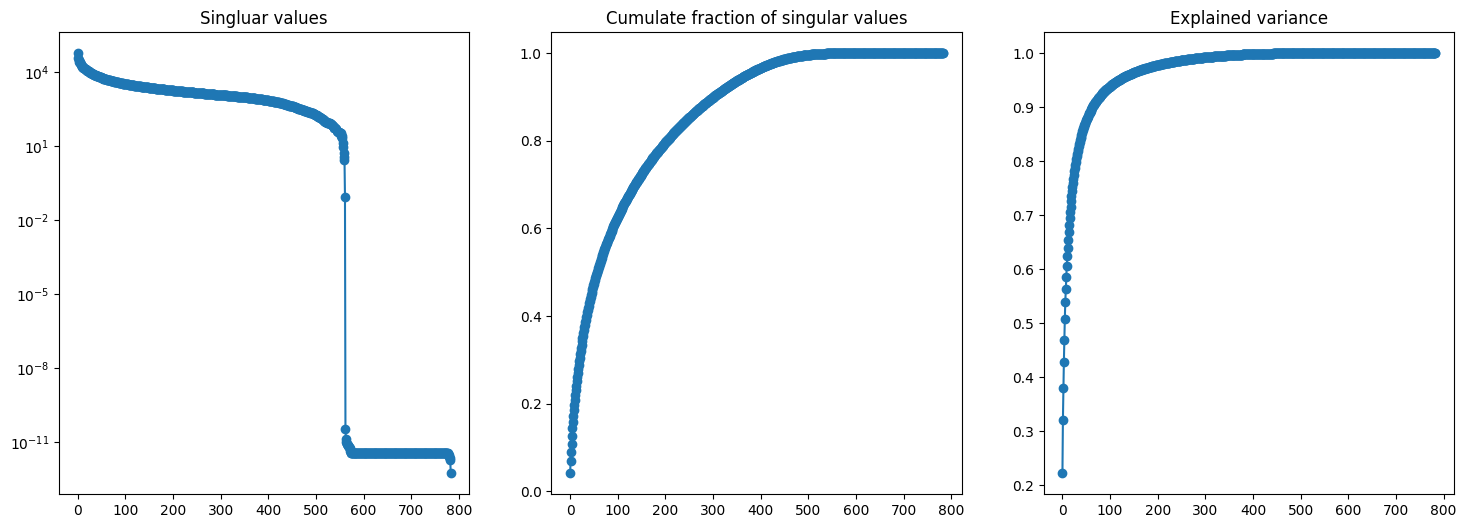

In [9]:
A_bar = A - A_mean[:, None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].semilogy(s, "o-")
axes[0].set_title("Singluar values")

axes[1].plot(np.cumsum(s) / np.sum(s), "o-")
axes[1].set_title("Cumulate fraction of singular values")

axes[2].plot(np.cumsum(s**2) / np.sum(s**2), "o-")
axes[2].set_title("Explained variance")

Visualize the first 30 principal axes


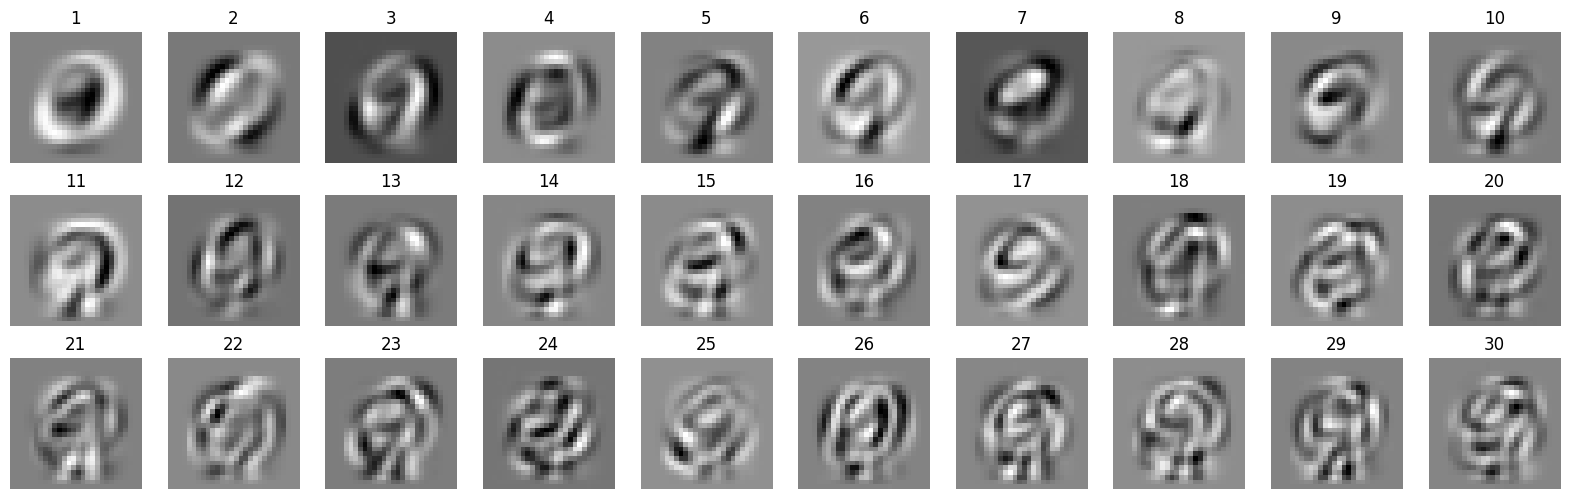

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(20, 6))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    image_i = U[:, i].reshape((28, 28))
    axs[i].imshow(image_i, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(str(i + 1))

Compute the first two principal components corresponding to the first image


In [11]:
print(f"1st principal component: {np.inner(A_bar[:, 0], U[:, 0])}" )
print(f"2nd principal component: {np.inner(A_bar[:, 0], U[:, 1])}" )

1st principal component: -529.0964148086613
2nd principal component: -580.8608501624375


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point


In [12]:
A_pc = np.matmul(U.T, A_bar)
print(f"1st principal component: {A_pc[0, 0]}")
print(f"2nd principal component: {A_pc[1, 0]}")

1st principal component: -529.0964148086612
2nd principal component: -580.8608501624373


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.


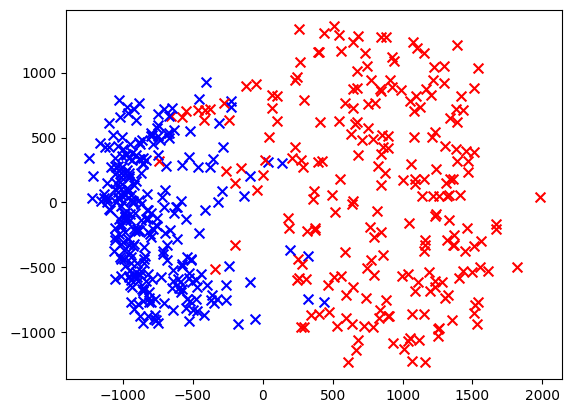

In [13]:
for i in range(500):
    x = np.inner(A_bar[:, i], U[:, 0])
    y = np.inner(A_bar[:, i], U[:, 1])
    col = "r" if labels[i] == digits[0] else "b"
    plt.scatter(x, y, marker="x", color=col, s=50)

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.


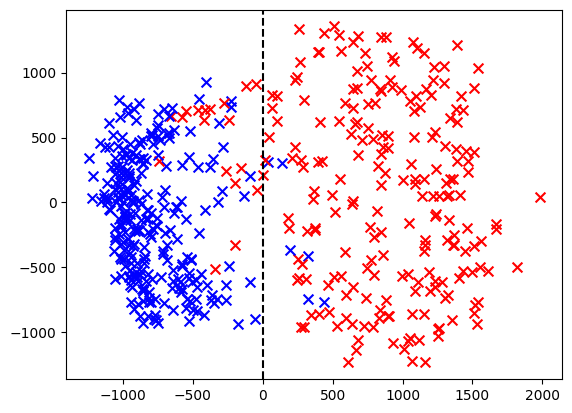

In [14]:
threshold = 0

for i in range(500):
    x = np.inner(A_bar[:, i], U[:, 0])
    y = np.inner(A_bar[:, i], U[:, 1])
    col = "r" if labels[i] == digits[0] else "b"
    plt.scatter(x, y, marker="x", color=col, s=50)

plt.axvline(threshold, color="k", linestyle="--")

In [16]:
data_test = np.genfromtxt("data_labs/mnist_test.csv", delimiter=",")
labels_full_test = data_test[:, 0]
A_full_test = data_test[:, 1:].transpose()
labels_full_test.shape, A_full_test.shape

((10000,), (784, 10000))

In [17]:
mask = np.logical_or(labels_full_test == digits[0], labels_full_test == digits[1])
A_test = A_full_test[:, mask]
labels_test = labels_full_test[mask]
labels_test.shape, A_test.shape

((1989,), (784, 1989))

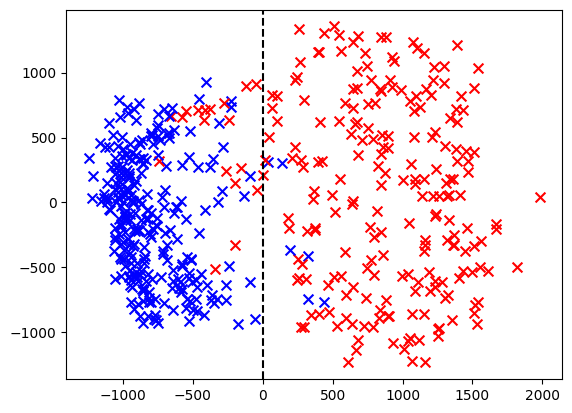

In [18]:
for i in range(500):
    x = np.inner(A_bar[:, i], U[:, 0])
    y = np.inner(A_bar[:, i], U[:, 1])
    col = "r" if labels[i] == digits[0] else "b"
    plt.scatter(x, y, marker="x", color=col, s=50)

plt.axvline(threshold, color="k", linestyle="--")

In [19]:
PC_1 = np.matmul(U[:, 0].transpose(), (A_test - A_mean[:, None]))

labels_predicted = np.empty(labels_test.shape).astype(int)
labels_predicted[PC_1 > threshold] = digits[0]
labels_predicted[PC_1 <= threshold] = digits[1]

true_0 = np.sum(np.logical_and(labels_test == digits[0], labels_predicted == digits[0]))
false_0 = np.sum(
    np.logical_and(labels_test == digits[1], labels_predicted == digits[0])
)
true_1 = np.sum(np.logical_and(labels_test == digits[1], labels_predicted == digits[1]))
false_1 = np.sum(
    np.logical_and(labels_test == digits[0], labels_predicted == digits[1])
)

print(f"true  {digits[0]}: {true_0}")
print(f"false {digits[0]}: {false_0}")
print(f"true  {digits[1]}: {true_1}")
print(f"false {digits[1]}: {false_1}")
accuracy = (true_0 + true_1) / (true_0 + true_1 + false_0 + false_1)
print(f"accuracy = {accuracy * 100:.2f} %")

true  0: 927
false 0: 30
true  9: 979
false 9: 53
accuracy = 95.83 %


You can do the same more compactly with scikit learn


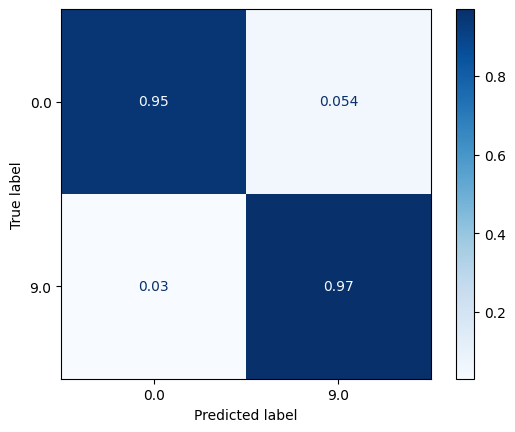

In [20]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(
    labels_test, labels_predicted, cmap=plt.cm.Blues, normalize="true"
)